In [58]:
import pandas as pd
import seaborn as sns

In [49]:
df = pd.read_csv("../../Data/Bank Customer Churn/Churn_Modelling.csv", header=0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [50]:
df = df.dropna()

In [51]:
X , y = df.drop(["Exited","Surname"], axis=1) , df['Exited']

In [52]:
X_cols = X.columns.to_list()

In [53]:
dtypes = X.dtypes.to_list()

In [54]:
obj_cols = []
for c_name , c_type in zip(X_cols , dtypes):
    if(c_type == "object"):
        obj_cols.append(c_name)
        print(f"{c_name} has {c_type} type")
        print(X[c_name].value_counts())

Geography has object type
Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64
Gender has object type
Gender
Male      5455
Female    4543
Name: count, dtype: int64


In [55]:
def grouped_mean(c_name):
    temp = df.groupby(c_name)["Exited"].transform("mean")   
    return temp

In [56]:
for c_name in obj_cols:
    X[c_name] = grouped_mean(c_name)

<Axes: >

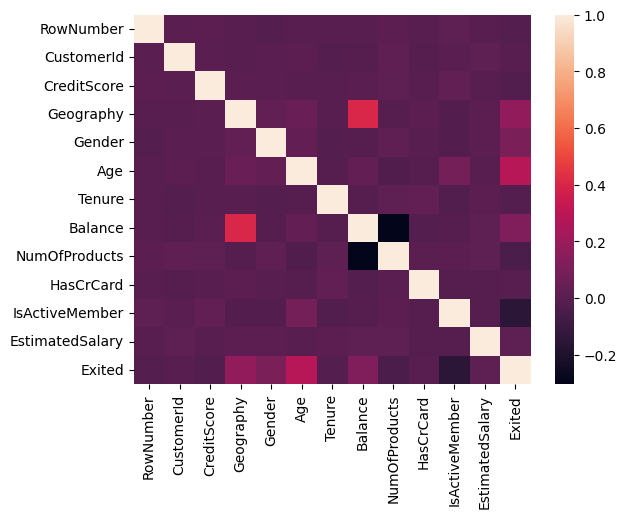

In [67]:
sns.heatmap(pd.concat([X,y], axis=1).corr())

In [77]:
pd.concat([X,y], axis=1).corr()['Exited'].sort_values(ascending=False).head()

Exited       1.000000
Age          0.285448
Geography    0.173776
Balance      0.118564
Gender       0.106186
Name: Exited, dtype: float64